In [30]:
# check the power spectra output sims

In [31]:
import os, sys                                                                                                                                                                                
from pixell import enmap, utils, lensing, aberration                                                                                                                                          
from pixell import powspec, curvedsky                                                                                                                                                         
import numpy as np, healpy as hp, logging, os, os.path as op                                                                                                                                  
import argparse
import matplotlib.pyplot as plt
from math import pi
# add the parent dir in the python path                                                                                                                                                       
sys.path.append(os.path.dirname(os.getcwd()))                                                                                                                                                 
import param
#import plotlib as pl

In [32]:
ls = np.arange(0, 6001, 1)
factor = ls*(ls+1)/(2*pi)

No handles with labels found to put in legend.


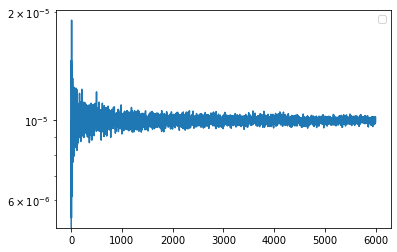

In [43]:
# check anisotropic rotation power spectrum from sim
if 1:
    alpha_alm = hp.read_alm('../simMaps/alpha_fullsky_alm_000.fits')
    alpha_cl = hp.alm2cl(np.complex128(alpha_alm))
    plt.plot(factor*alpha_cl)
    plt.yscale('log')
    plt.legend()

In [34]:
# check kappa power spectrum from sim
if 0:
    phi_alm = hp.read_alm('../simMaps/kappa_fullsky_alm_000.fits')
    phi_cl = hp.alm2cl(np.complex128(phi_alm))
    plt.plot(factor*phi_cl)
    plt.yscale('log')
    plt.legend()

In [35]:
theory_cl = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lensedCls.dat')

In [36]:
imap_alm = hp.read_alm('../simMaps/CMBLensed_fullsky_alm_000.fits', hdu=(1,2,3))
imap_cl = hp.alm2cl(np.complex128(imap_alm))

In [44]:
omap_alm = hp.read_alm('../simMaps/CMBLensedRot_fullsky_alm_000.fits', hdu=(1,2,3))
omap_cl = hp.alm2cl(np.complex128(omap_alm))

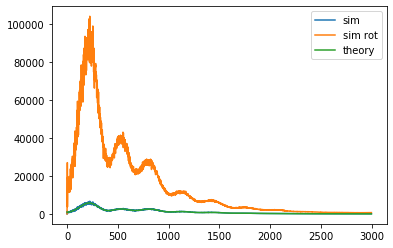

In [45]:
plt.plot(factor[1:3000]*imap_cl[0][1:3000], label='sim')
plt.plot(factor[1:3000]*omap_cl[0][1:3000], label='sim rot')
plt.plot(theory_cl[1:3000,1], label='theory')
plt.legend()
#plt.yscale('log')
#plt.xscale('log')
#plt.plot(factor*omap_cl[0])

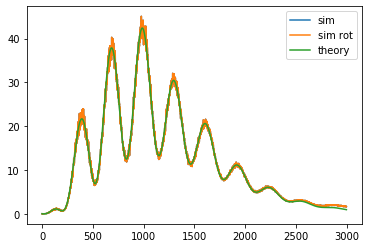

In [39]:
plt.plot(factor[1:3000]*imap_cl[1][1:3000], label='sim')
plt.plot(factor[1:3000]*omap_cl[1][1:3000], label='sim rot')
plt.plot(theory_cl[1:3000,2], label='theory')
plt.legend()

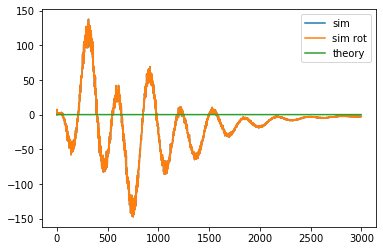

In [40]:
plt.plot(factor[1:3000]*imap_cl[3][1:3000], label='sim')
plt.plot(factor[1:3000]*omap_cl[3][1:3000], label='sim rot')
plt.plot(theory_cl[1:3000,3], label='theory')
plt.legend()